# Logistic regression practices

In [1]:
import numpy as np

#### Sigmoid function is used to make logistic regression function output between 0 and 1

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### Logistic regression cost function

In [213]:
def cost_function(X, y, theta):
    m = X.shape[0]
    predictions = np.dot(X, theta)
    predictions = sigmoid(predictions)
    error = -(np.multiply(y, np.log(predictions)) + np.multiply((1-y), np.log(1 - predictions)))
    j_value = 1 / m * sum(error)
    gradient = 1 / m * np.dot(X.transpose(), (predictions - y))
    return j_value, gradient

#### Prepare data

In [193]:
X = np.array([[1,2,3], [1, 2,3], [1, 2, 3], [1, 2, 3]])
y = np.array([[1], [0], [1], [1]])
theta = np.ones((X.shape[1], 1))

In [184]:
cost_function(X, y, theta)

(array([1.50247569]), array([[0.24752738],
        [0.49505475],
        [0.74258213]]))

### Feature scaling
#### In order to make all feature on same scale we use feature scaling. By this way minimizer function will converge faster

In [159]:
def normalize_features(X):
    min_x = X.min()
    max_x = X.max()
    scaled = (X - min_x) / (max_x - min_x)
    return scaled

#### Data preprocessing

In [194]:
X = normalize_features(X)
X = np.c_[np.ones((X.shape[0], 1)), X]
theta = np.zeros((X.shape[1], 1))

#### Gradient descent

In [191]:
def gradient_descent(X, y, theta, alpha, iteration_count):
    j_values = []
    for _ in range(iteration_count):
        j_value, gradient = cost_function(X, y, theta)
        theta = theta - alpha * gradient
        j_values.append(j_value)
    return j_values

#### Visualize gradient descent iterations

In [208]:
j_values = gradient_descent(X, y, theta, 0.5, 100)

In [199]:
import matplotlib.pyplot as plt

In [201]:
number_of_iterations = np.arange(1, 101)

Text(0, 0.5, 'J($\\dot{\\Theta}$)')

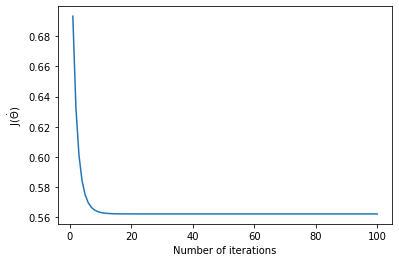

In [212]:
plt.plot(number_of_iterations, j_values);
plt.xlabel('Number of iterations')
plt.ylabel('J($\dot{\Theta}$)')